In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Loading the dataset

In [2]:
data = pd.read_csv("data.csv")

## Data Exploration

In [3]:
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 180 columns):
Unnamed: 0    11500 non-null object
X1            11500 non-null int64
X2            11500 non-null int64
X3            11500 non-null int64
X4            11500 non-null int64
X5            11500 non-null int64
X6            11500 non-null int64
X7            11500 non-null int64
X8            11500 non-null int64
X9            11500 non-null int64
X10           11500 non-null int64
X11           11500 non-null int64
X12           11500 non-null int64
X13           11500 non-null int64
X14           11500 non-null int64
X15           11500 non-null int64
X16           11500 non-null int64
X17           11500 non-null int64
X18           11500 non-null int64
X19           11500 non-null int64
X20           11500 non-null int64
X21           11500 non-null int64
X22           11500 non-null int64
X23           11500 non-null int64
X24           11500 non-null int64
X25           

In [4]:
data.describe()

X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.03336    160.436352   
min    -1757.000000  -1832.000000  -1778.00000  -1840.00000  -1867.000000   
25%      -54.000000    -54.000000    -55.00000    -55.00000    -54.000000   
50%       -8.000000     -8.000000     -8.00000     -7.00000     -7.000000   
75%       36.000000     35.000000     36.00000     36.00000     35.250000   
max     1816.000000   2047.000000   2047.00000   2047.00000   2047.000000   

           ...               X170          X171          X172          X173  \
count      ...       11500.000000  11500.000000  11500.000000  11500.000000   
mean       ...         -10.145739    -11.630348    -12.943478    -13.668870   
std        ...         164.652883    166.149790    168.554058    168.556486   
min        ...       -1867.000000  -1865.000000  -1642.000000  -1723.000000   
25%        ...         -55.000000    -56.000000    -56.000000    -56.000000   
50%        ...          -9.000000    -10.000000    -10.000000    -10.000000   
75%        ...          34.000000     34.000000     33.000000     33.000000   
max        ...        1777.000000   1472.000000   1319.000000   1436.000000   

               X174          X175          X176          X177          X178  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -13.363304    -13.045043    -12.705130    -12.426000    -12.195652   
std      167.257290    164.241019    162.895832    162.886311    164.852015   
min    -1866.000000  -1863.000000  -1781.000000  -1727.000000  -1829.000000   
25%      -55.000000    -56.000000    -55.000000    -55.000000    -55.000000   
50%      -10.000000     -9.000000     -9.000000     -9.000000     -9.000000   
75%       34.000000     34.000000     34.000000     34.000000     34.000000   
max     1733.000000   1958.000000   2047.000000   2047.000000   1915.000000   

                  y  
count  11500.000000  
mean       3.000000  
std        1.414275  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000  

[8 rows x 179 columns]

# No NaNs in the dataset, all integers. This is a clean dataset and no transformation is necessary 
   # at this point, only "Unnamed: 0" will be dropped.
   # Before being used for any model the data needs to be scaled.

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

### Checking for correlations in the dataset

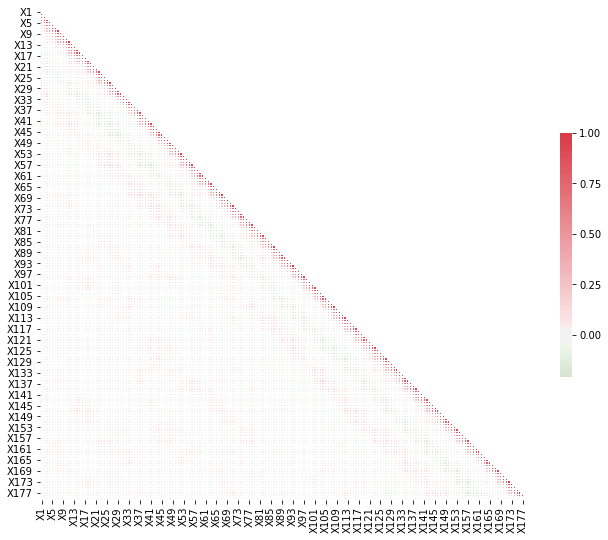

In [6]:
Correlation_matrix = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(Correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(120, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(Correlation_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# There are three clear correlation lines visible. The strongest positive correlation is with the nearest neighbors. But what about the correlation to the target variable?

In [7]:
target_correlation = data.drop(["y"], axis=1).apply(lambda x: x.corr(data.y))

# checking the highest 10 correlations to the target variabel
print(target_correlation.sort_values(ascending=False)[0:10])

X173    0.029172
X174    0.028563
X175    0.028425
X176    0.027259
X177    0.026156
X178    0.025168
X172    0.022893
X1      0.022375
X125    0.021866
X61     0.021723
dtype: float64


In [8]:
# Checking the highest 10 VIF scores
X = data.drop("y", axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.sort_values("VIF Factor", ascending=False)[0:10])

     VIF Factor features
161  555.978219     X162
37   535.025584      X38
13   522.282914      X14
7    517.894008       X8
6    515.915933       X7
159  513.565708     X160
38   512.138802      X39
66   511.305632      X67
64   509.225767      X65
158  509.111948     X159


# These are pretty high! next up: A function to reduce the features till the max VIF is < 5

In [9]:
def reduce_features_VIF(X, VIF_max=5):
    """Reduces the DataFrame X in columns untill the max VIF of the entire DatFrame is below the user-set threshhold
    
    Arguments
    ---------
    X: pandas.DataFrame
        The DataFrame contains all features and will be reduced in this function
    VIF_max: integer or float
        The maximum threshhold to which VIF is allowed
        
    Returns
    -------
    pandas.DataFrame
        The resulting DataFrame
    """
    # initiating vif DataFrame with feature names and intial VIF score
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    
    # Reducing features until highest VIF score is below VIF_max
    while vif["VIF Factor"].max() >= VIF_max:
        X = X.drop(vif[vif["VIF Factor"] == vif["VIF Factor"].max()]["features"], axis=1)
        vif = pd.DataFrame()
        vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif["features"] = X.columns
        
    return X, vif


In [31]:
# Reduce the dataset untill all VIF scores are below 5 and save the results to a csv file as the computation is time intense!
X_2, vif_2 = reduce_features_VIF(data.drop(["y"], axis=1))
print(vif.sort_values("VIF Factor", ascending=False)[0:10])

X_2.to_csv("X_2.csv", index=False)
vif_2.to_csv("vif_2.csv", index=False)

     VIF Factor features
161  555.978219     X162
37   535.025584      X38
13   522.282914      X14
7    517.894008       X8
6    515.915933       X7
159  513.565708     X160
38   512.138802      X39
66   511.305632      X67
64   509.225767      X65
158  509.111948     X159


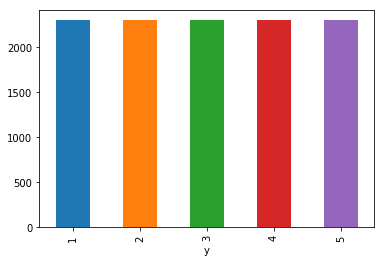

In [10]:
# Let's check how the respose variable is distributed
data["y2"] = data["y"].replace([3, 4, 5], 2)
by_y = data.groupby('y')
by_y2 = data.groupby('y2')

# Plot the distribution of the original dataset
by_y.size().plot(kind='bar')

# The dataset is balanced.

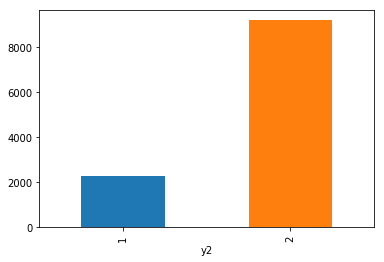

In [11]:
# print the distribution of the dataset for task 1
by_y2.size().plot(kind='bar')

In [12]:
# print histogramms
data.hist(figsize=[150, 150])
plt.show()

# The data is following gaussian distribution, appart from the target variable, which is equaly distributed.

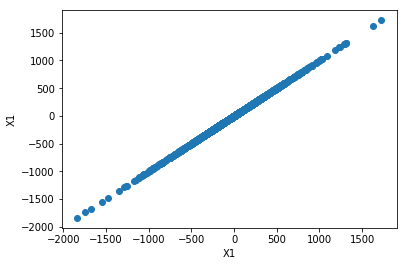

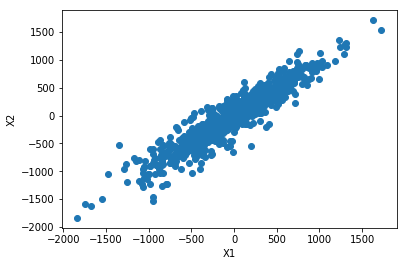

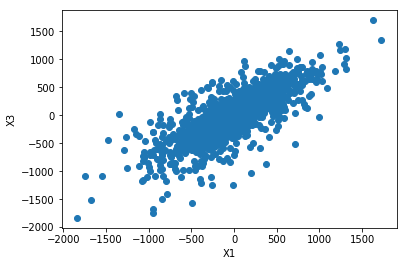

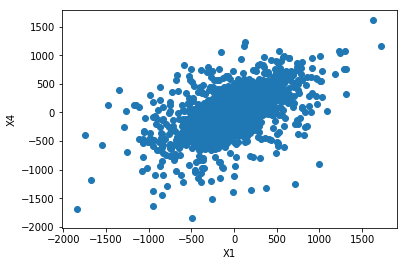

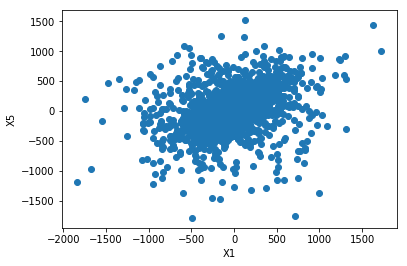

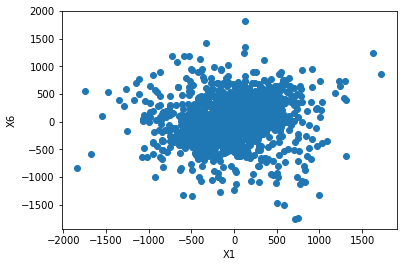

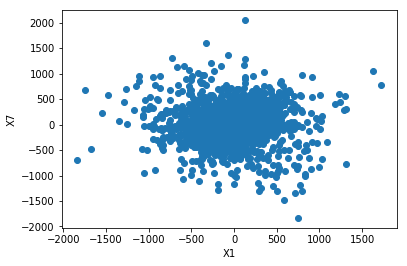

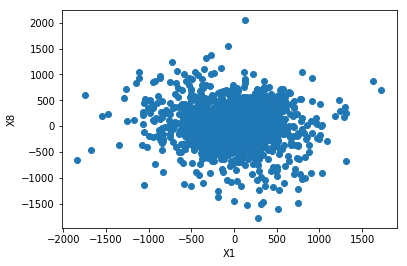

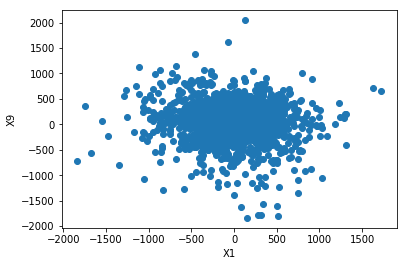

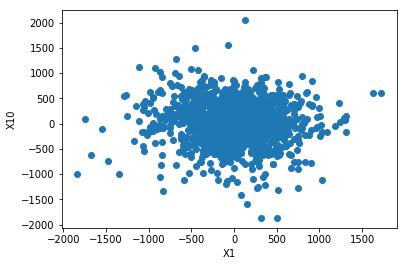

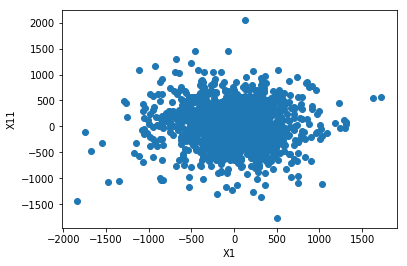

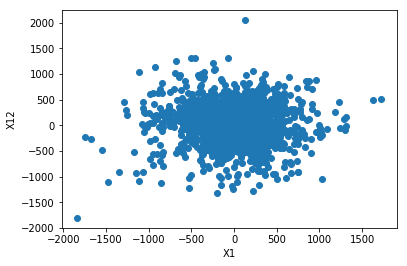

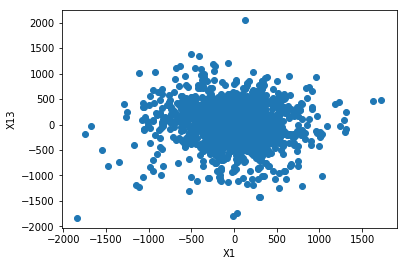

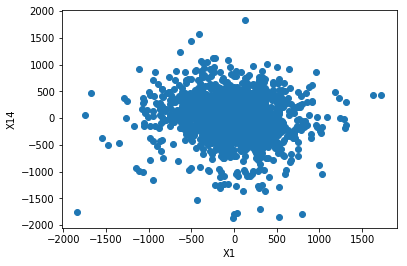

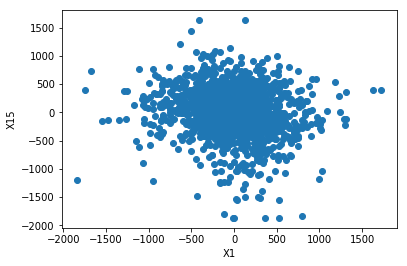

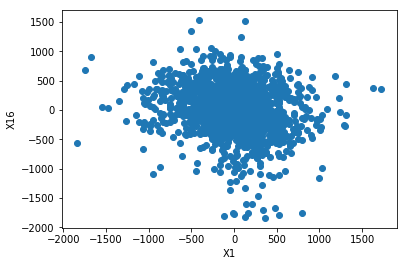

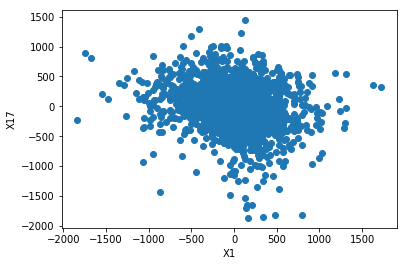

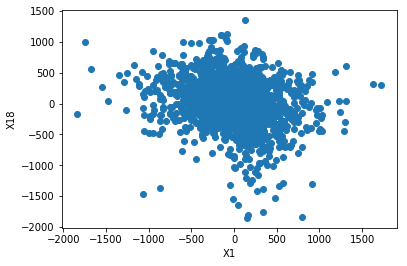

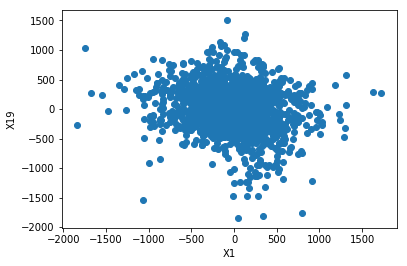

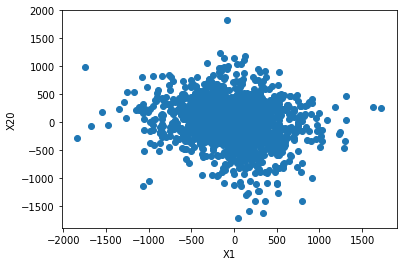

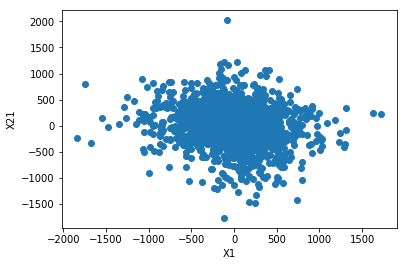

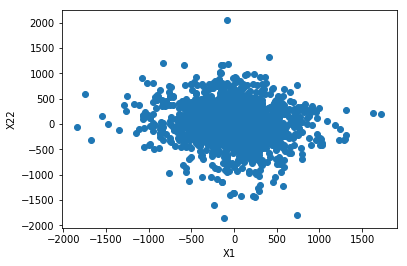

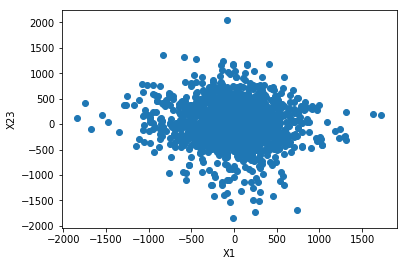

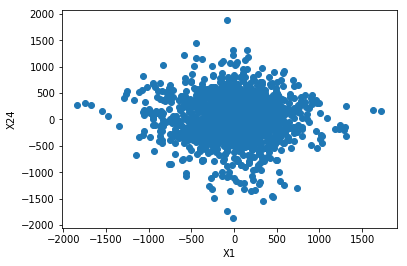

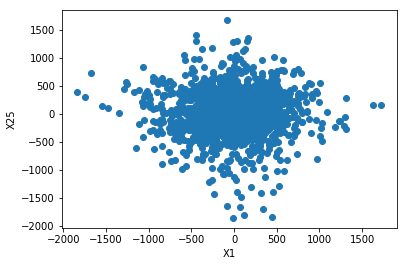

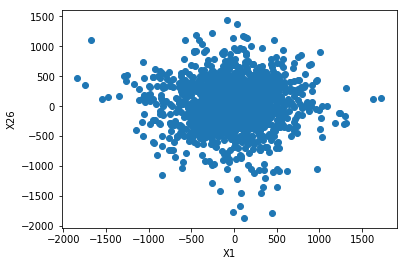

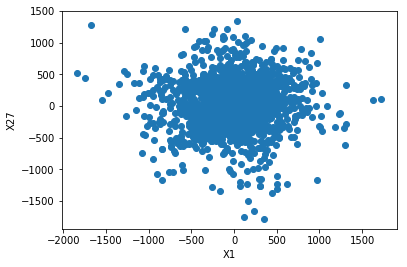

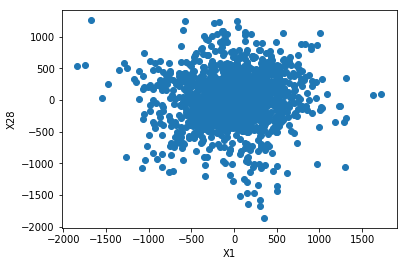

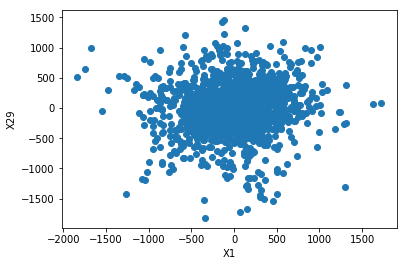

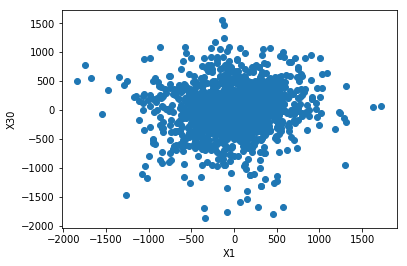

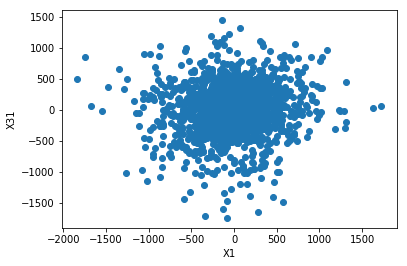

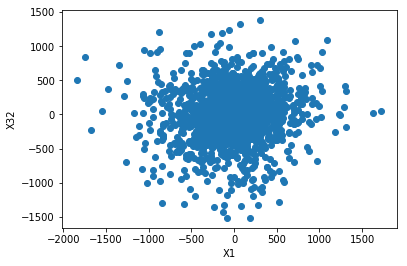

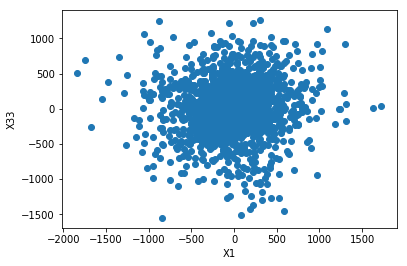

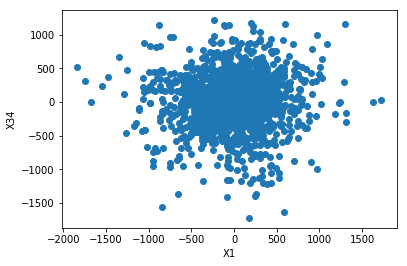

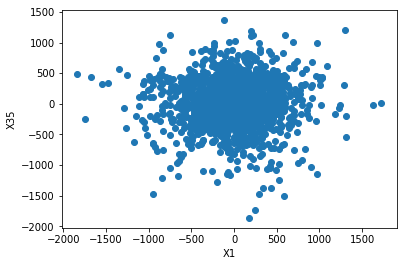

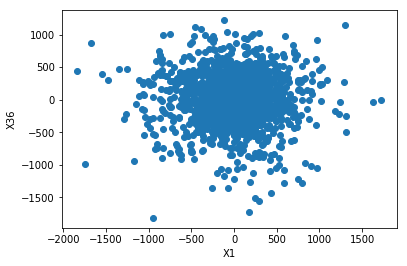

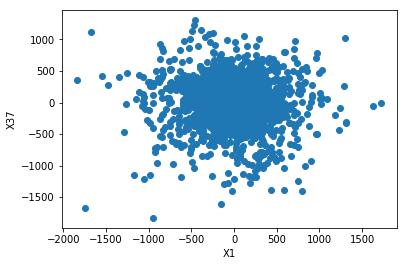

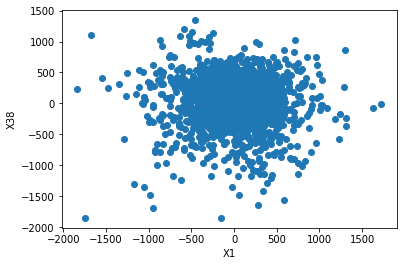

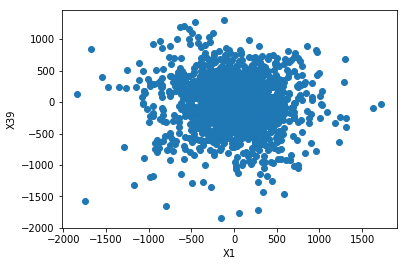

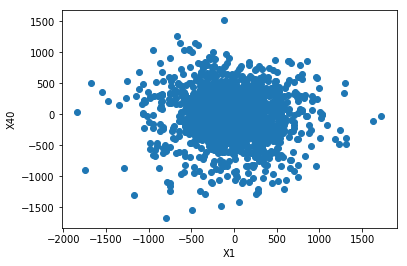

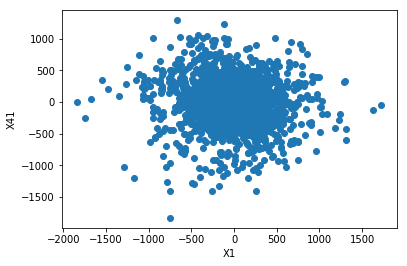

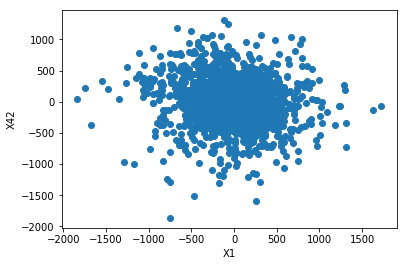

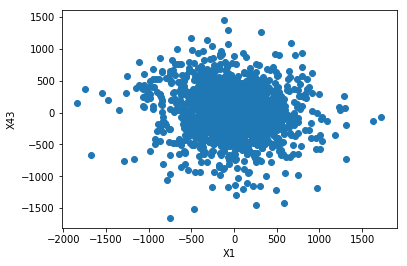

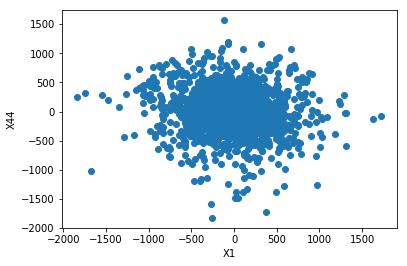

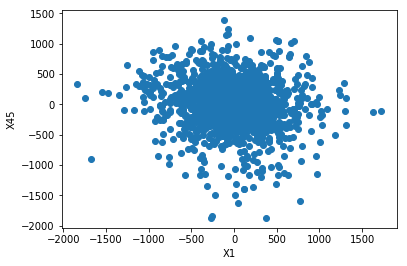

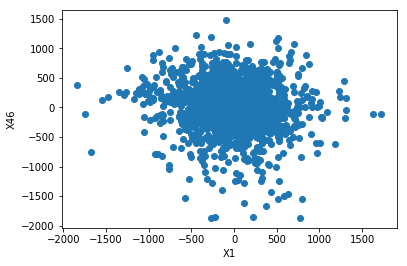

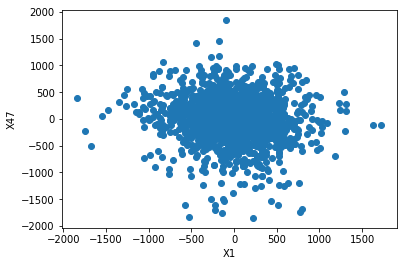

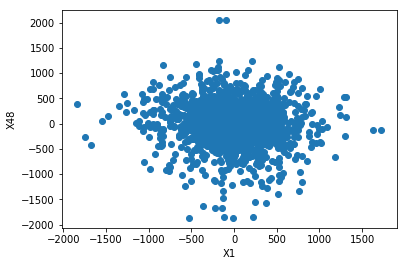

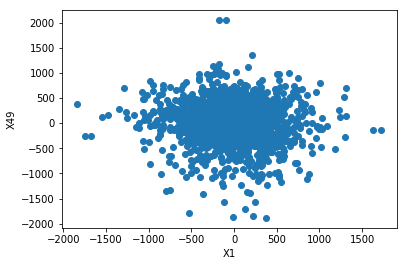

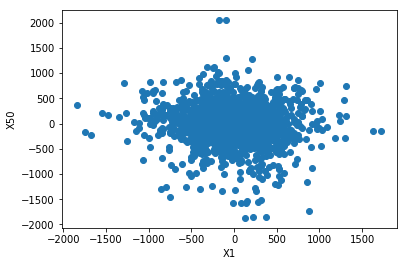

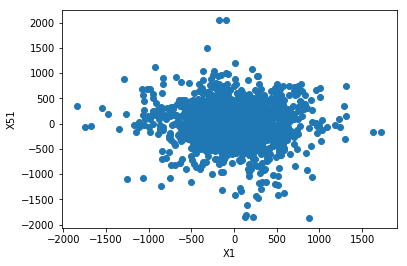

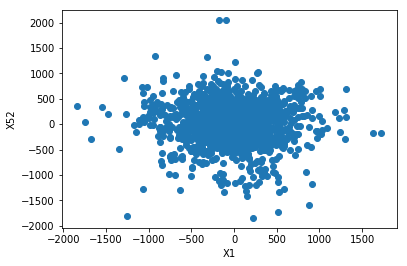

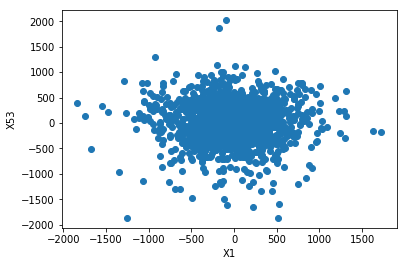

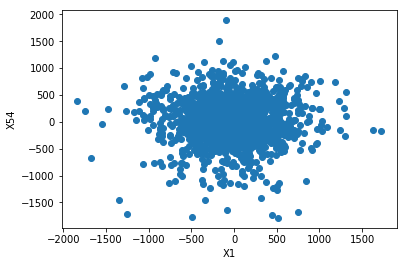

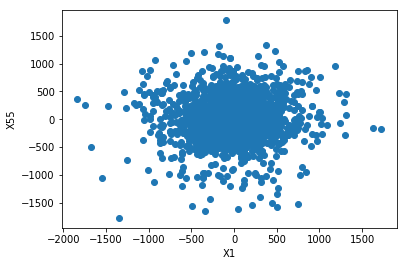

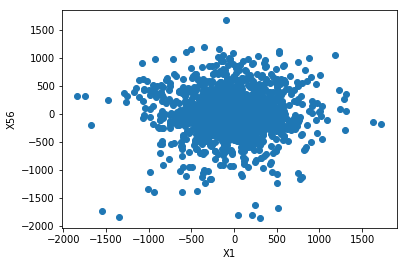

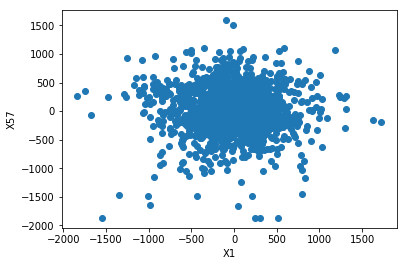

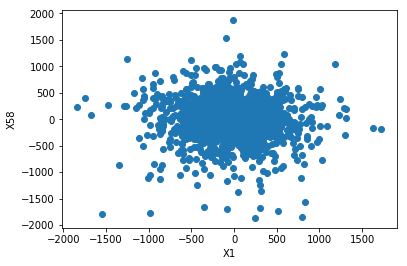

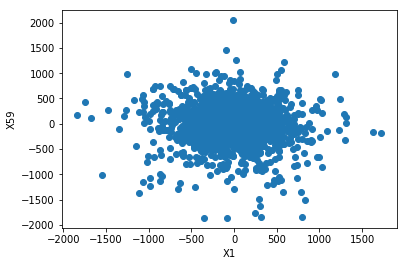

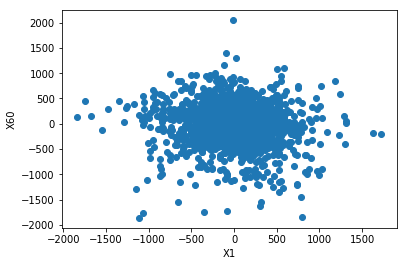

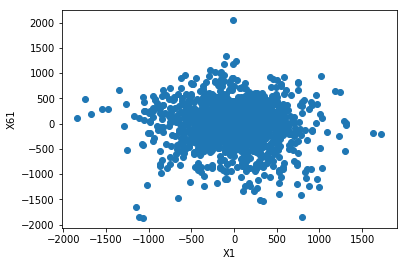

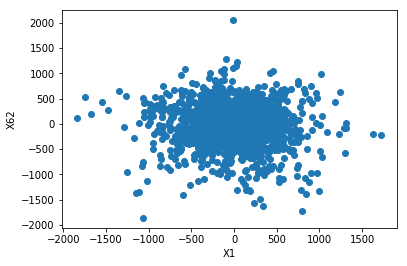

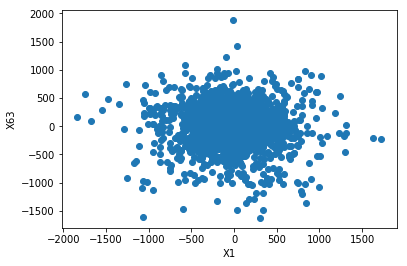

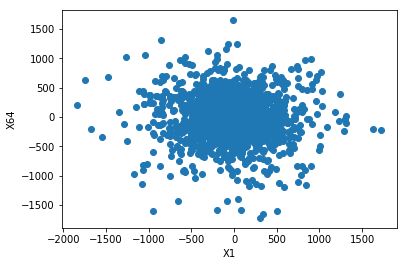

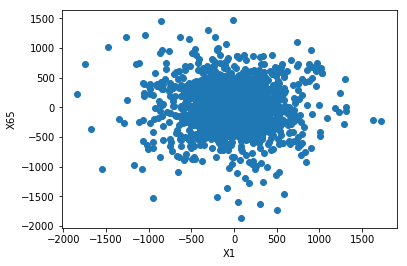

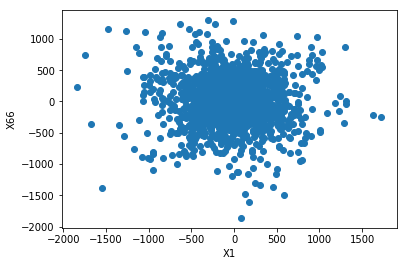

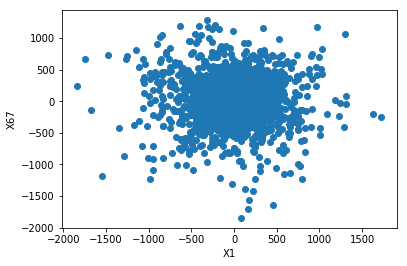

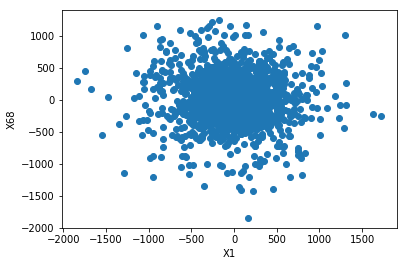

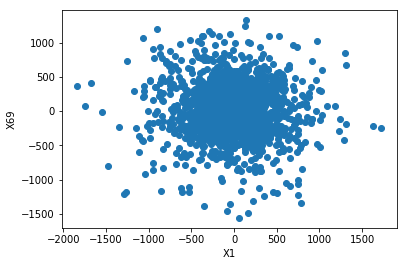

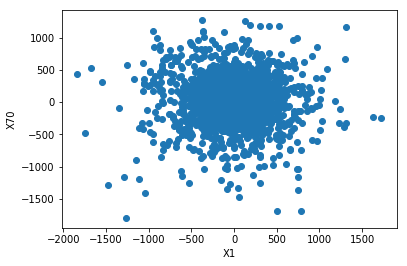

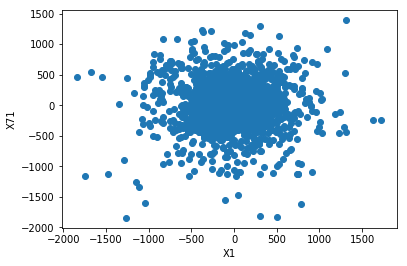

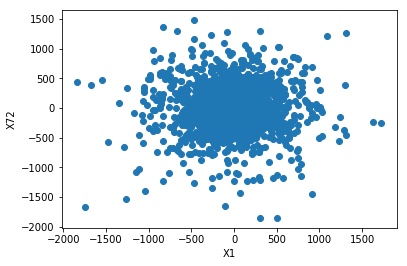

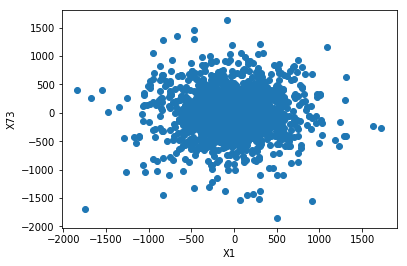

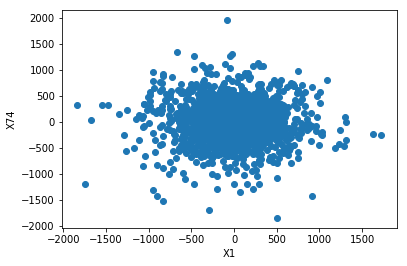

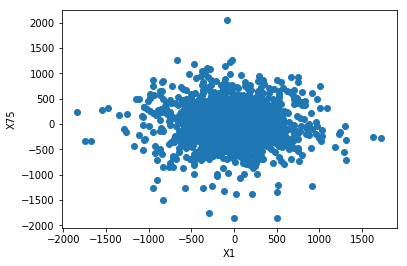

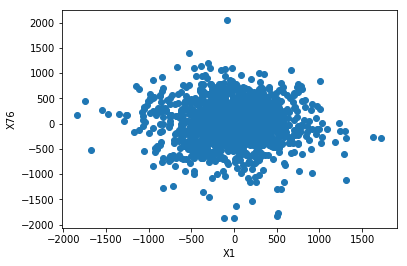

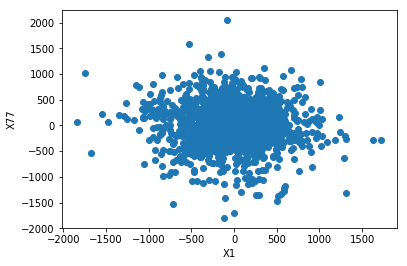

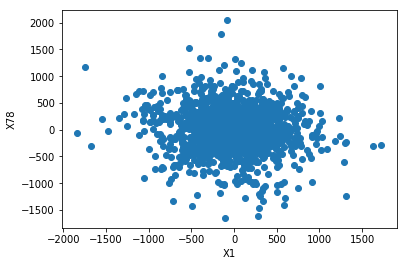

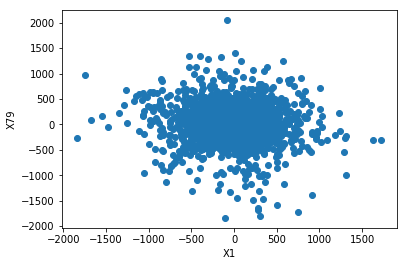

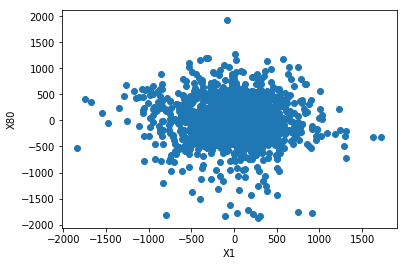

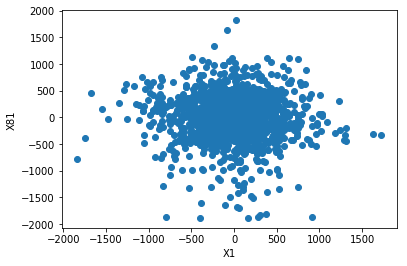

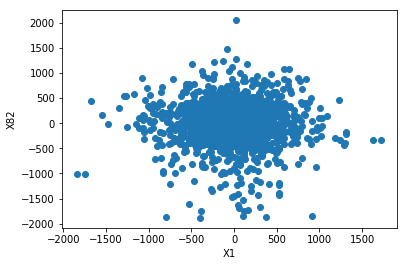

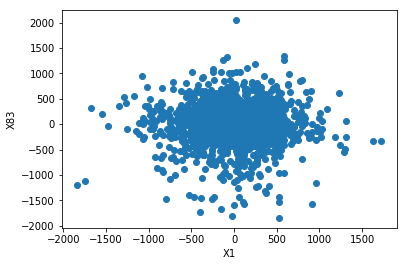

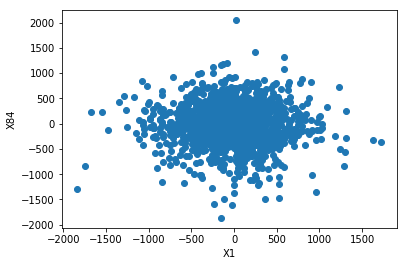

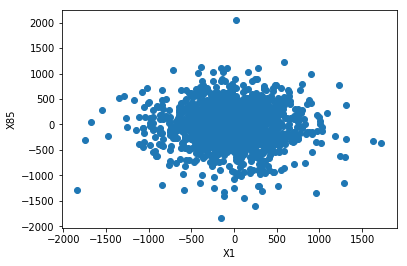

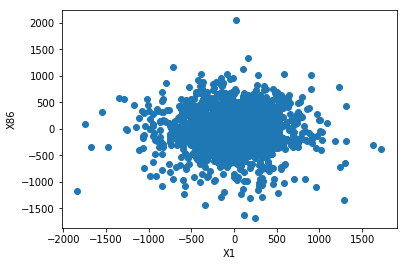

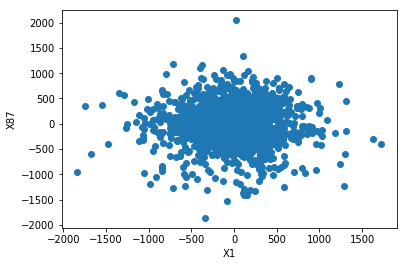

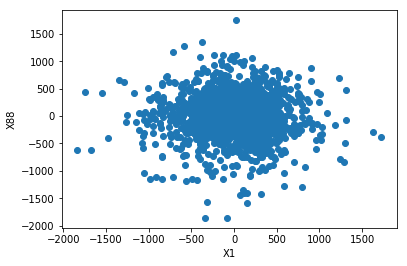

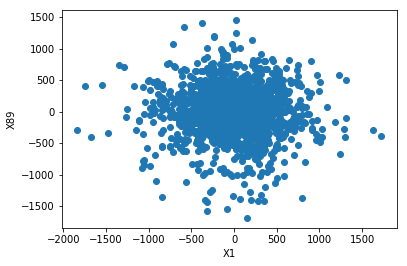

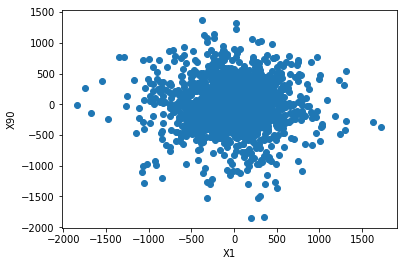

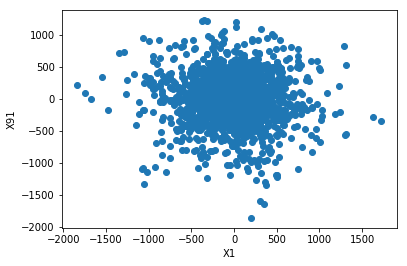

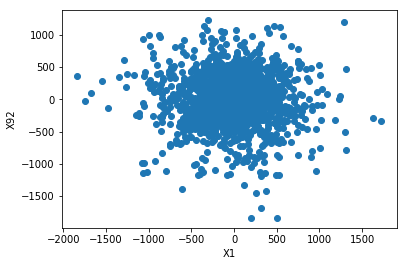

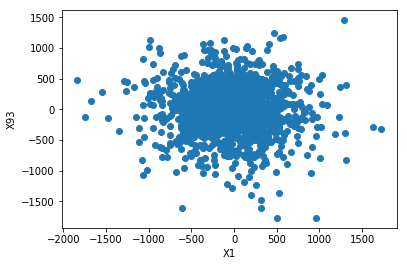

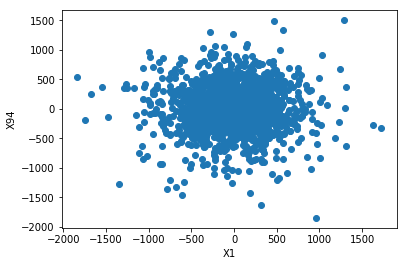

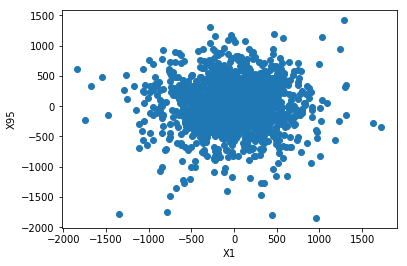

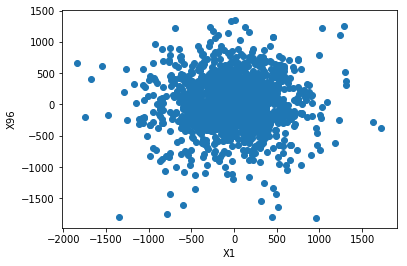

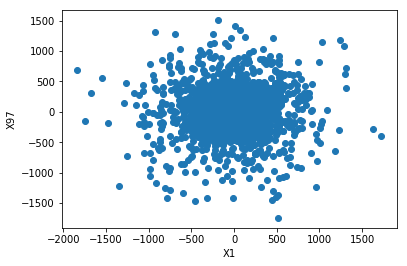

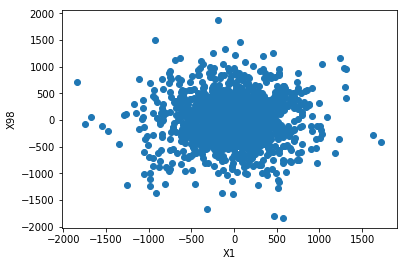

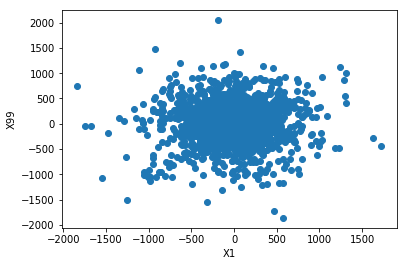

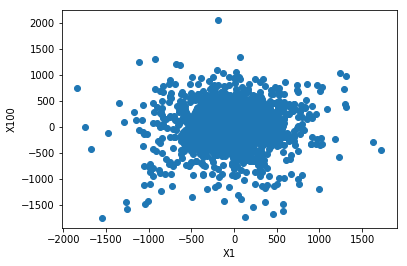

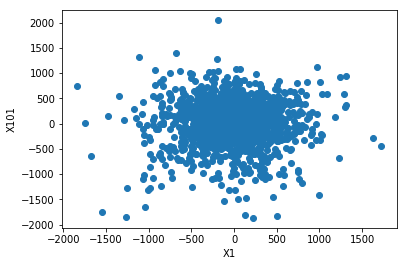

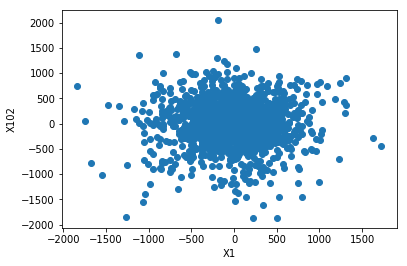

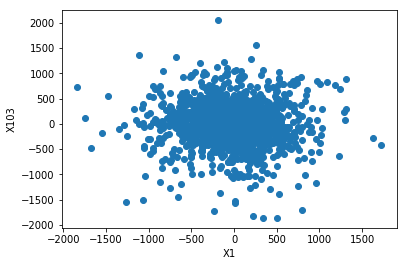

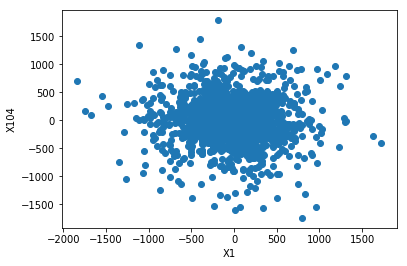

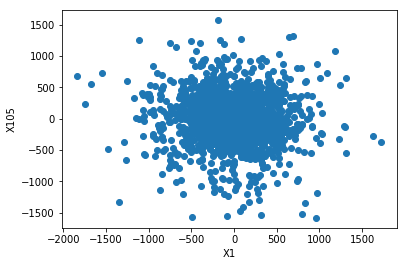

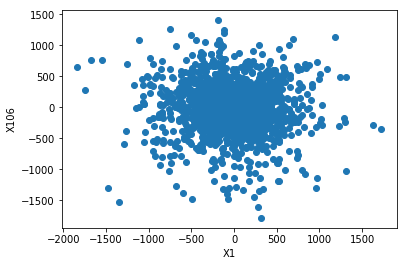

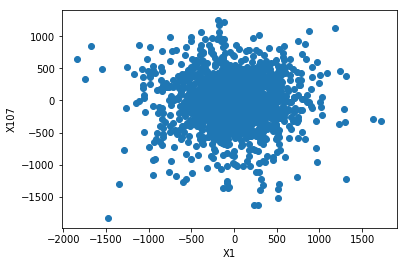

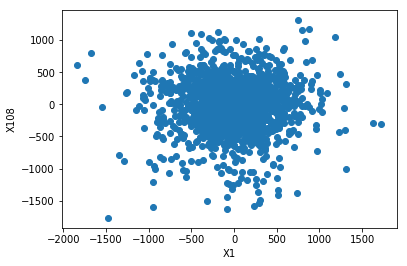

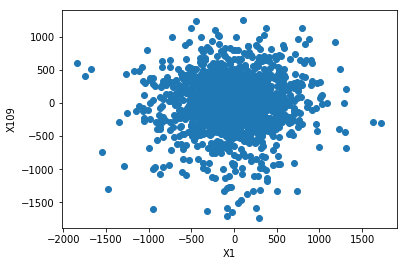

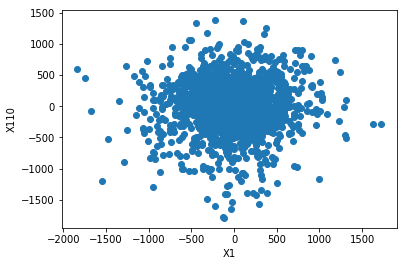

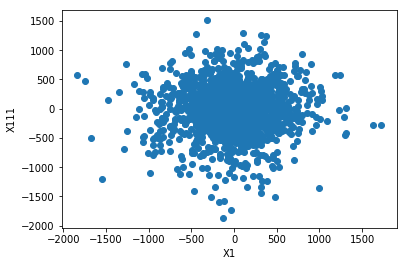

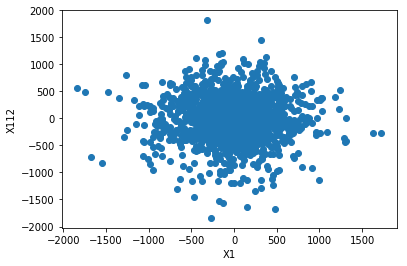

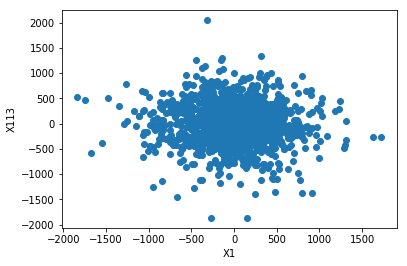

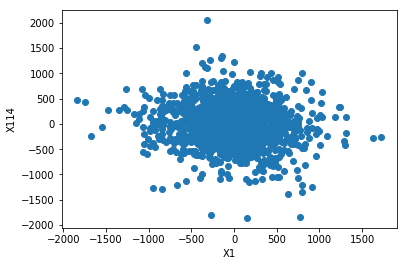

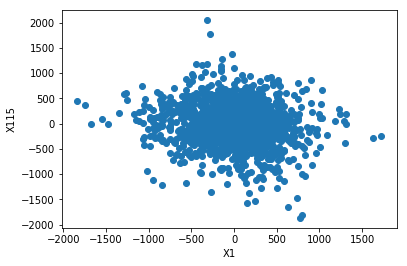

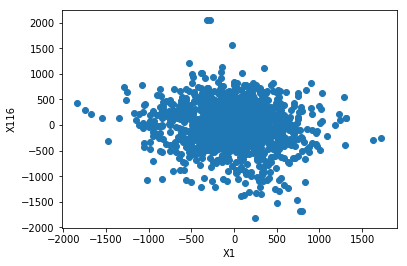

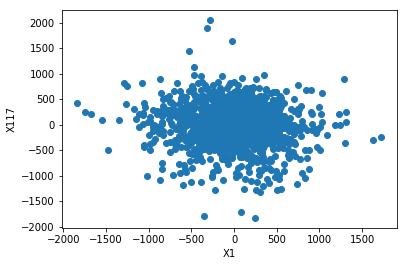

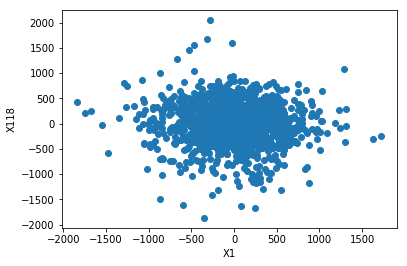

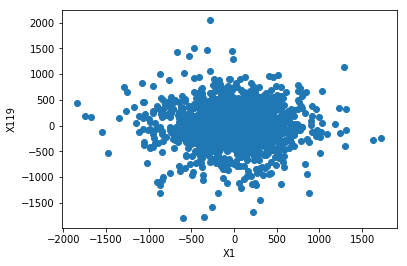

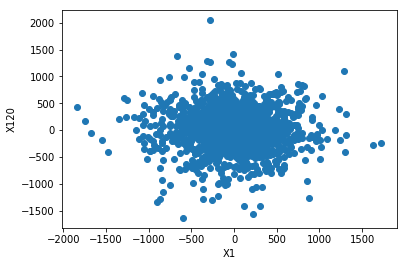

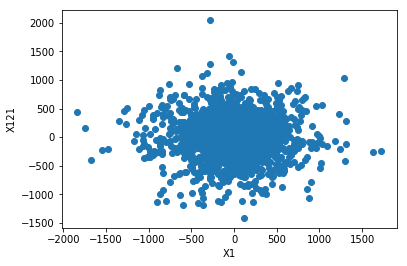

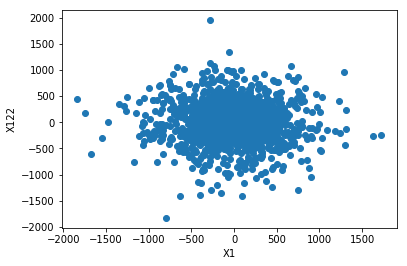

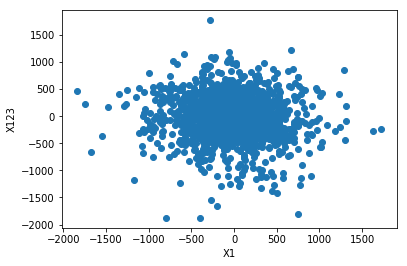

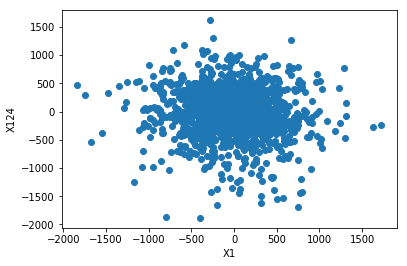

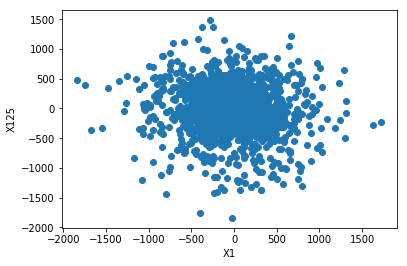

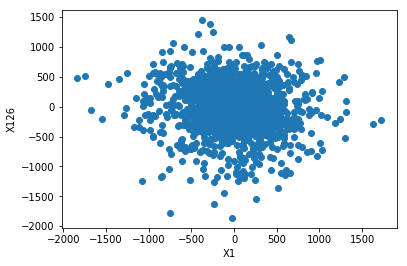

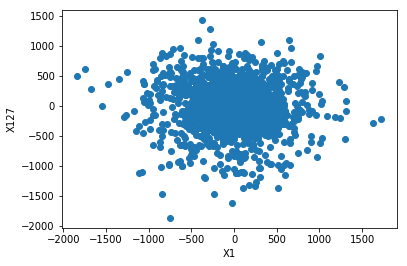

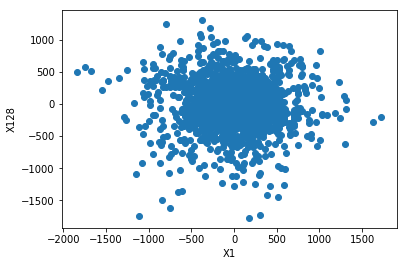

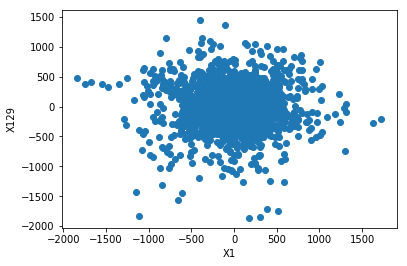

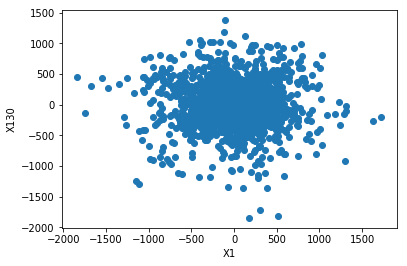

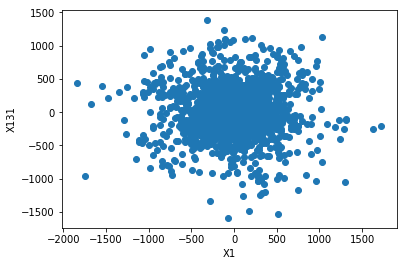

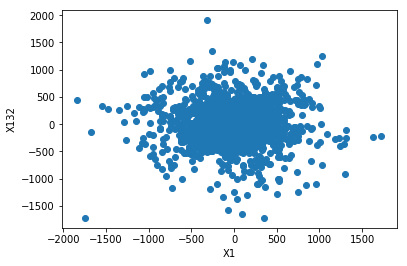

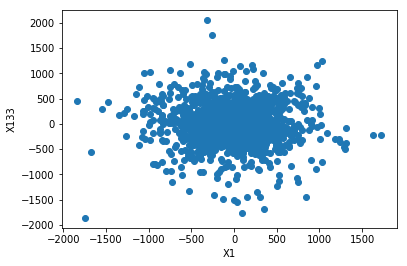

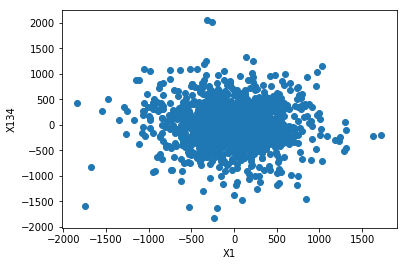

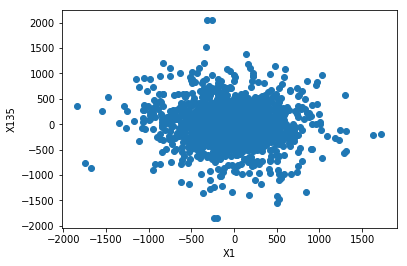

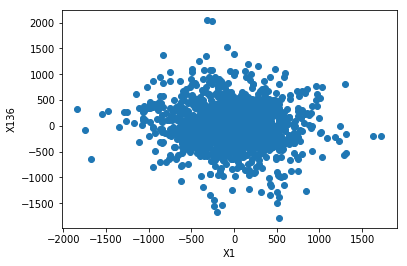

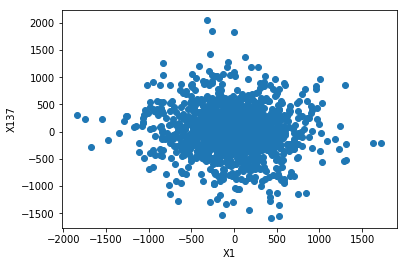

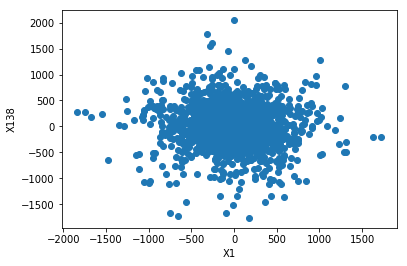

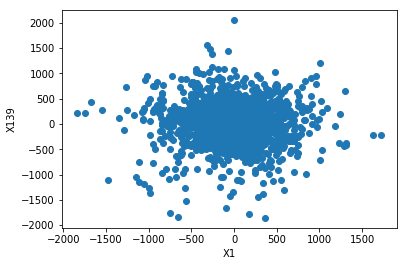

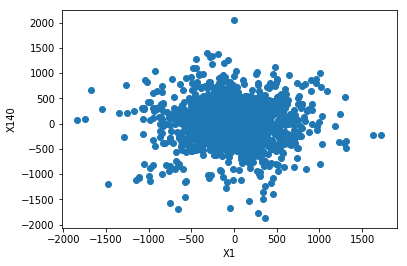

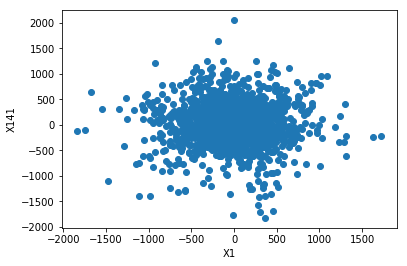

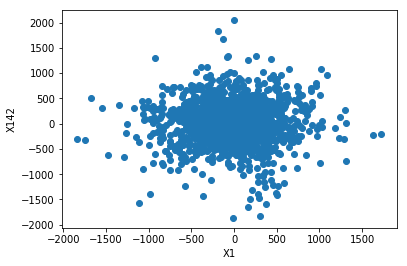

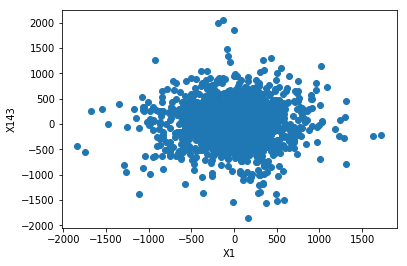

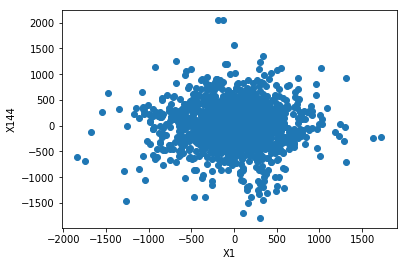

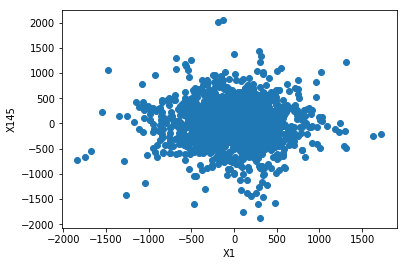

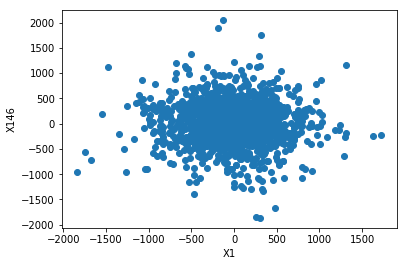

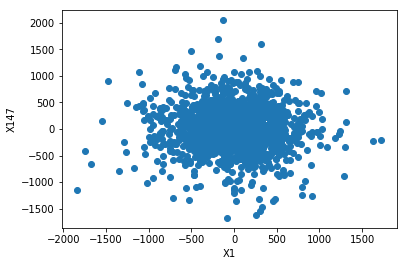

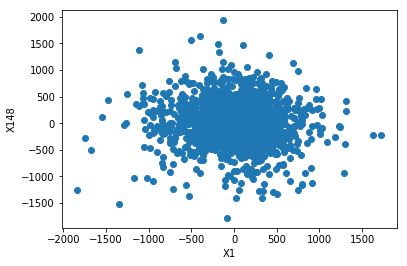

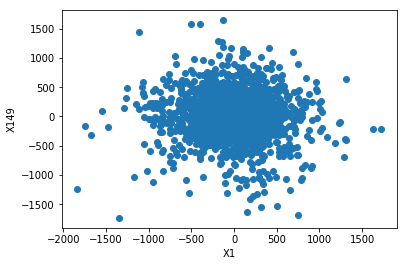

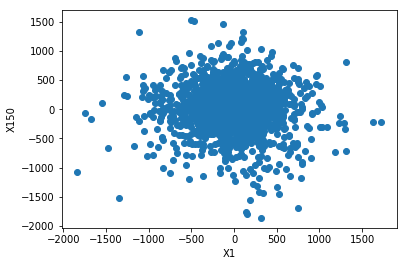

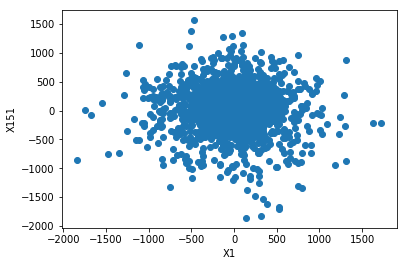

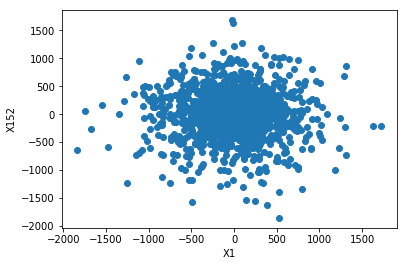

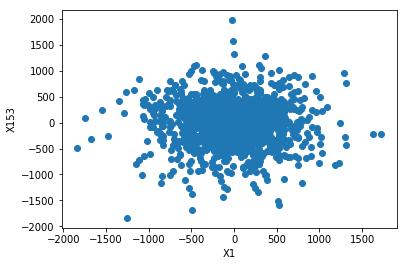

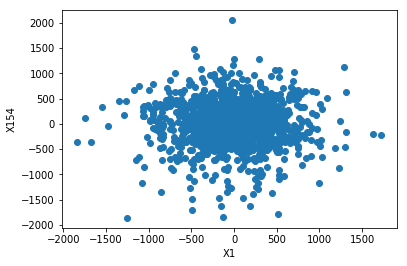

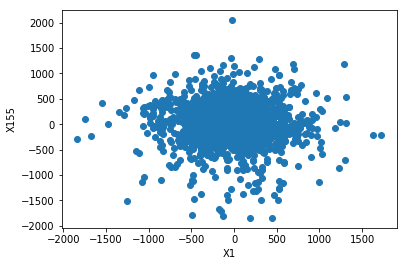

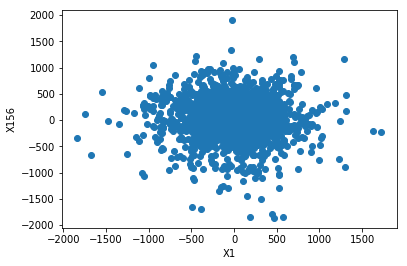

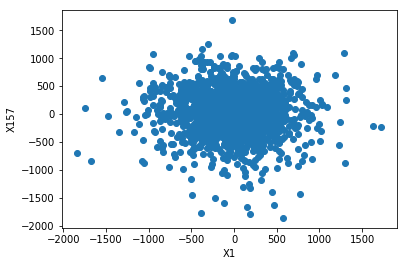

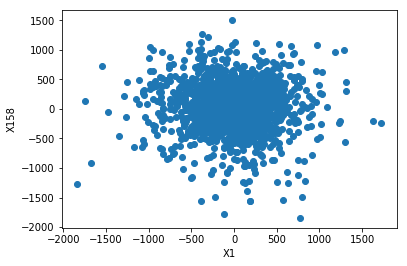

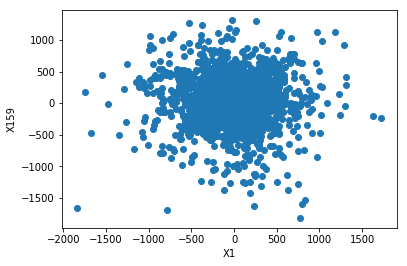

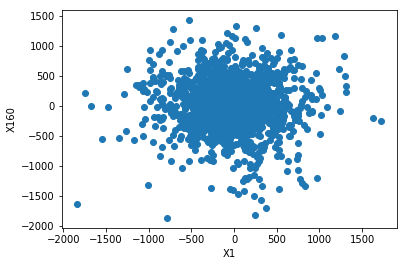

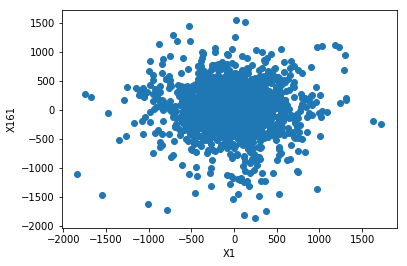

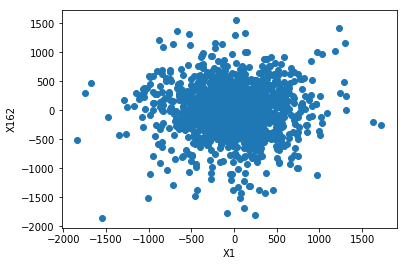

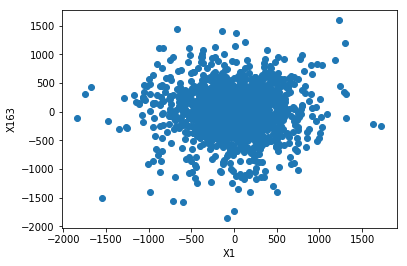

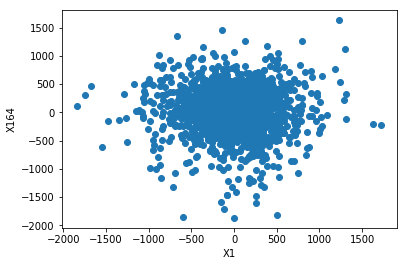

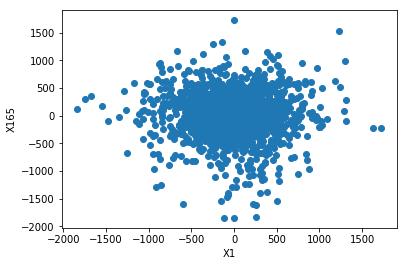

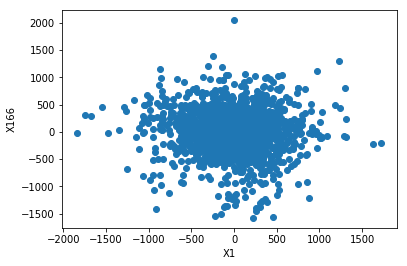

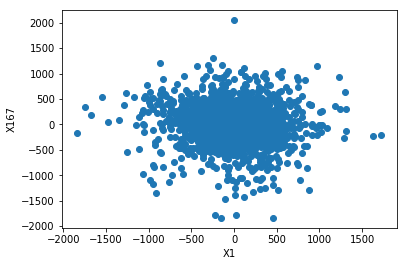

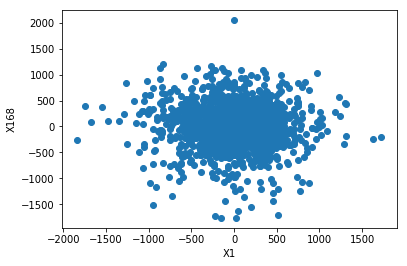

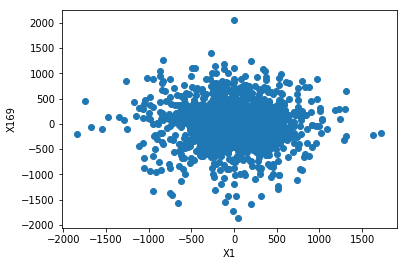

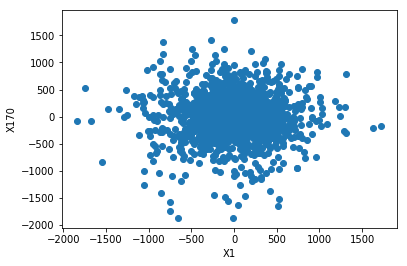

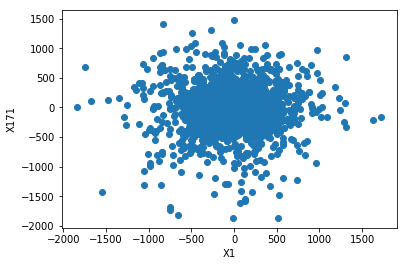

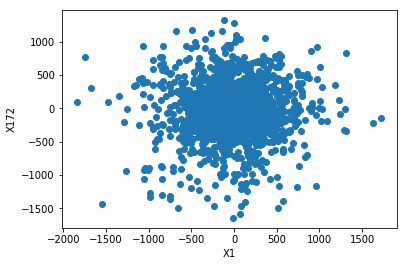

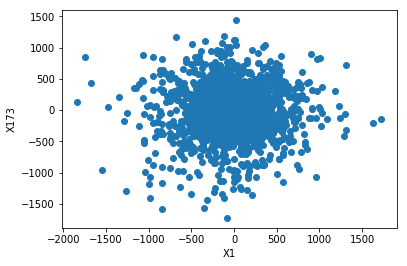

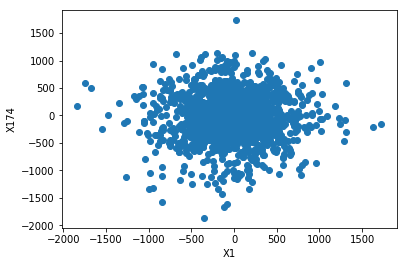

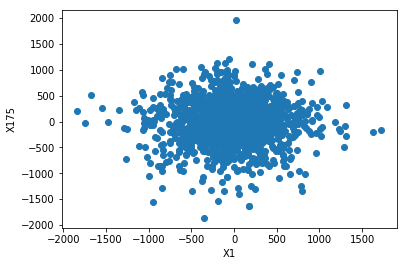

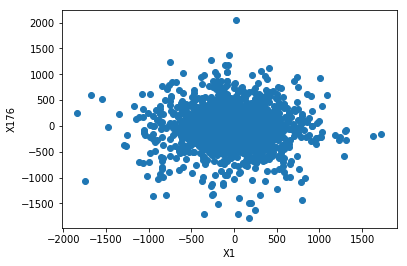

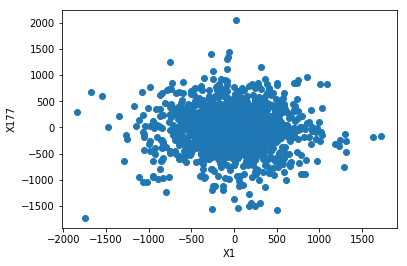

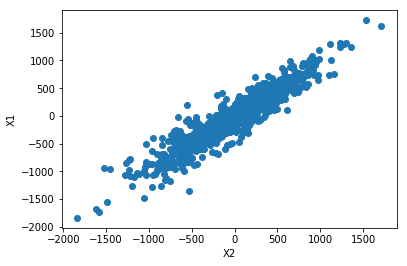

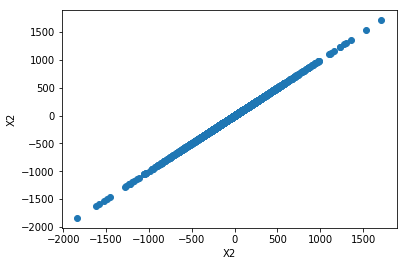

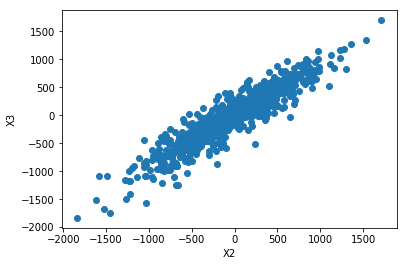

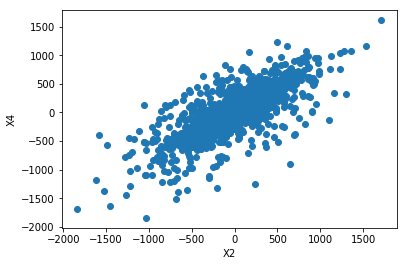

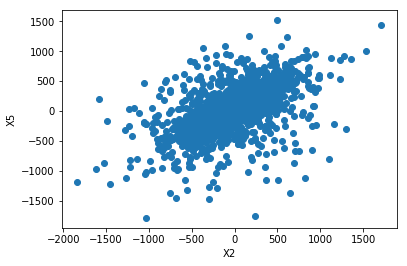

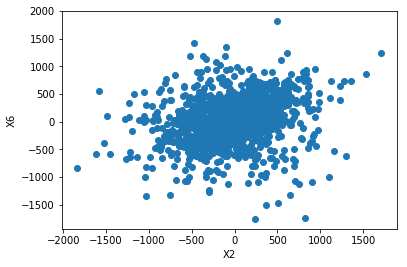

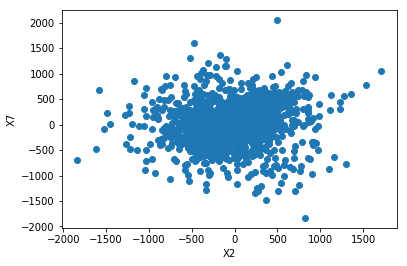

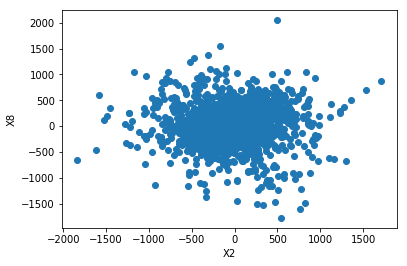

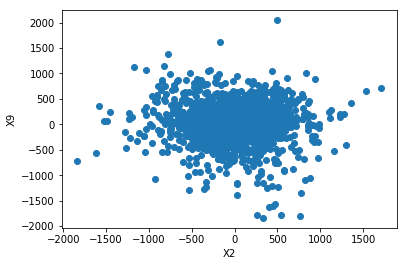

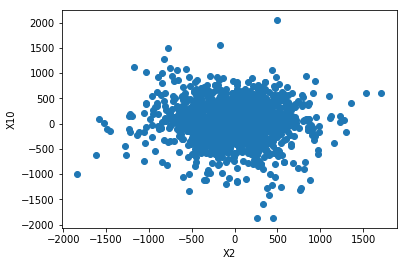

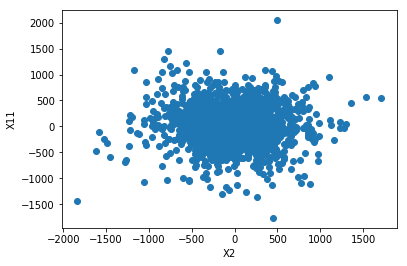

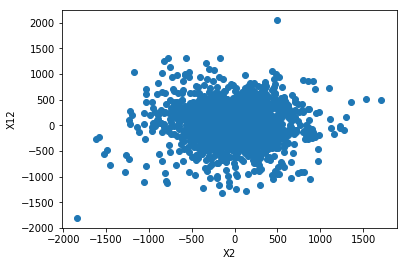

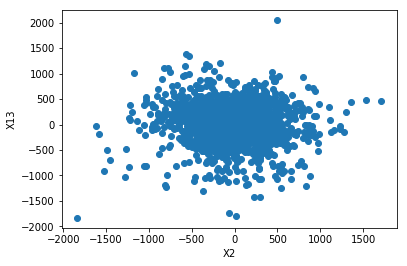

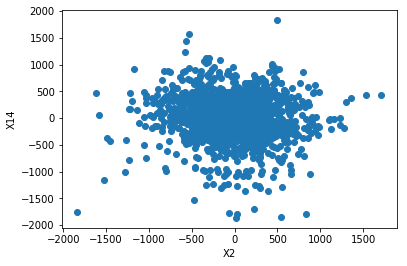

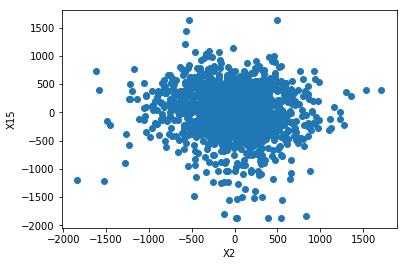

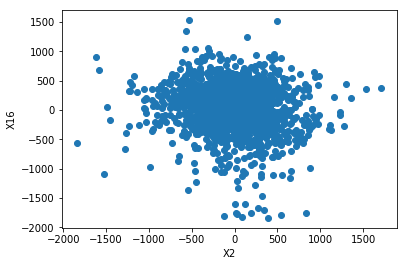

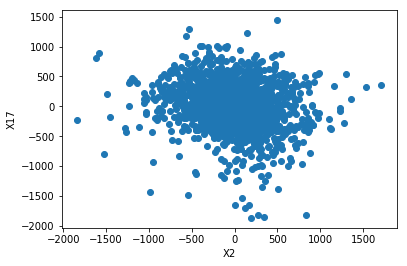

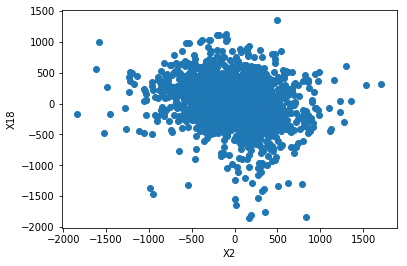

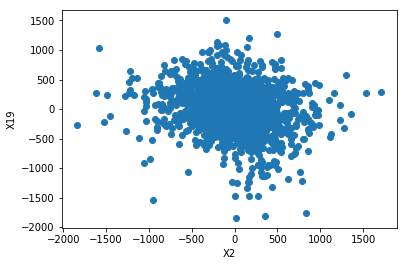

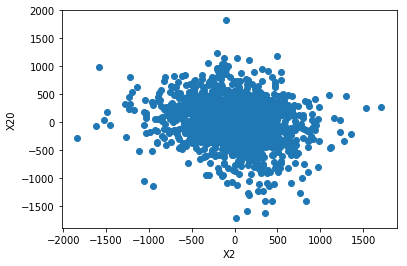

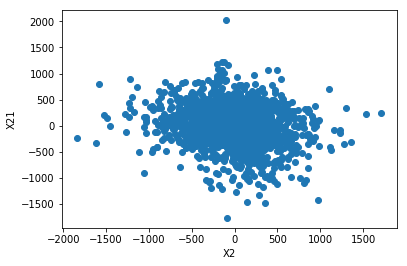

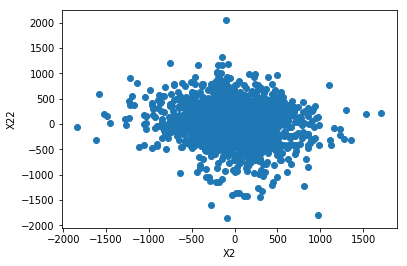

In [ ]:
# Plotting the scattermatrix as a whole is taking too long for my computer so I'll do it plot by plot.
for i in range(1, 178): 
    for k in range(1, 178):
        plt.scatter(data['X%i' % i], data['X%i' % k])
        plt.xlabel("X%i" % i)
        plt.ylabel("X%i" % k)
        plt.show()

# These plots show again what was seen in the heatmap before: there are cross correlations between the parameters. Features that are neighbours seem to have higher correlation. The correlation also always seems to be linear. Next up is the correlation of the variables towards the target variable. As this produces a lot less plots let's use more fancy seabourne joint plots!

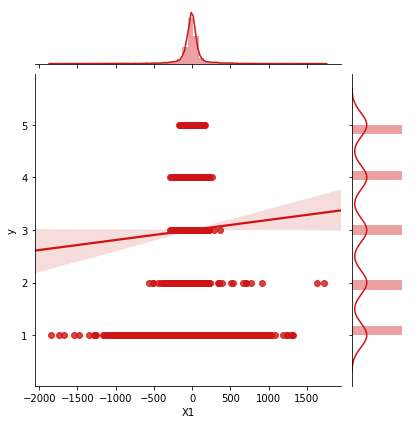

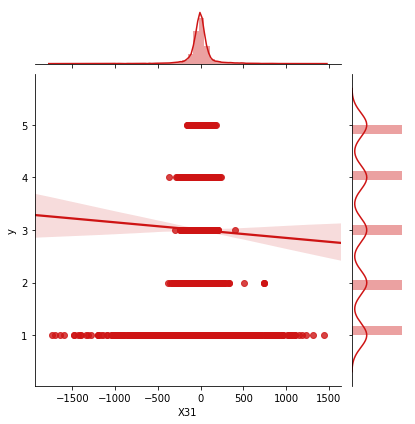

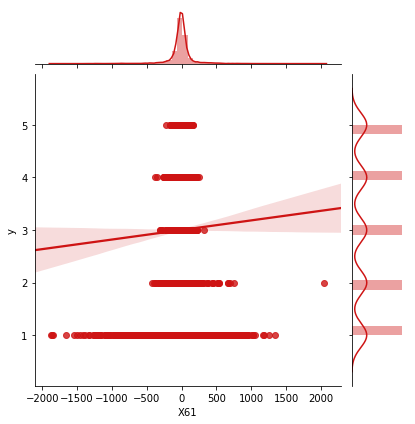

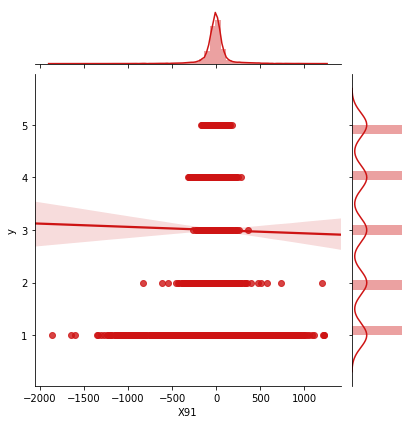

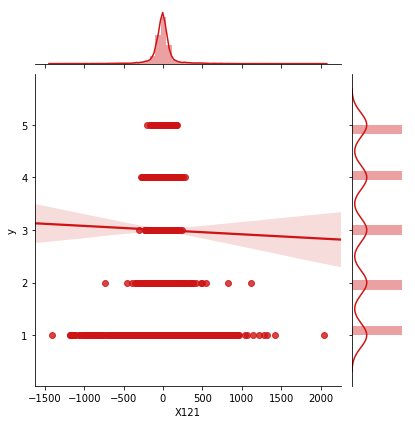

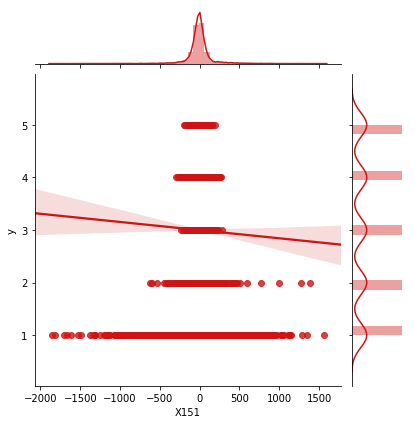

In [18]:
# Plotting the scattermatrix as a whole is taking too long for my computer so I'll do it plot by plot. 
# Not plotting every plot but every 30th
for i in range(1, 178, 30): 
    sb.jointplot(data.loc[:,'X%i' % i], data.loc[:,'y'], kind="regg", color="#ce1414")
    plt.show()

# From these plots I would interpret that class 1 should be easy to classify as the variance is higher in all parameters. This is also an indication that PCA could work pretty well. Differentiating between the other 4 is going to be more difficult. Let's look at some violin plots, they should be giving the same message. But first the data needs to be scaled.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

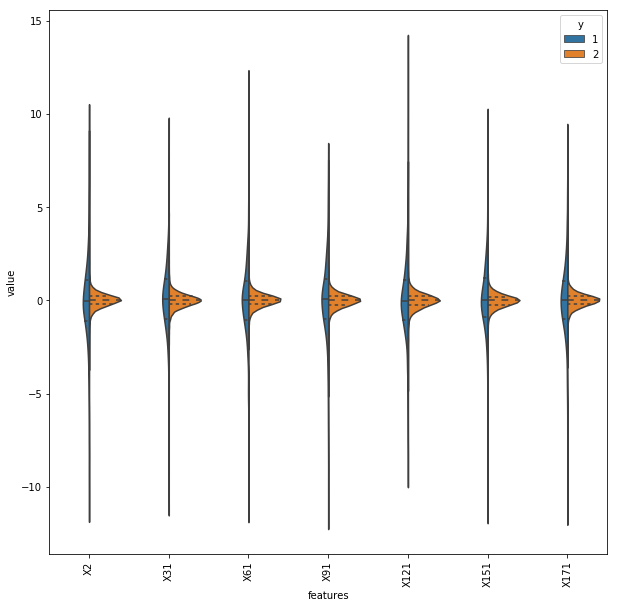

In [8]:
X = data.drop("y", axis=1)
y = data["y"]
y2 = data["y"].replace([3, 4, 5], 2)
X_scaled = (X - X.mean()) / (X.std())

data_scaled = pd.concat([y2,X_scaled.iloc[:,[1,30,60,90,120,150,170]]],axis=1)
data_scaled = pd.melt(data_scaled,id_vars="y", var_name="features", value_name='value')

plt.figure(figsize=(10,10))
sb.violinplot(x="features", y="value", hue="y", data=data_scaled, split=True, inner="quart")
plt.xticks(rotation=90)

# The means seems to be pretty close together but as before the variance is different. What does it look like for all classes?

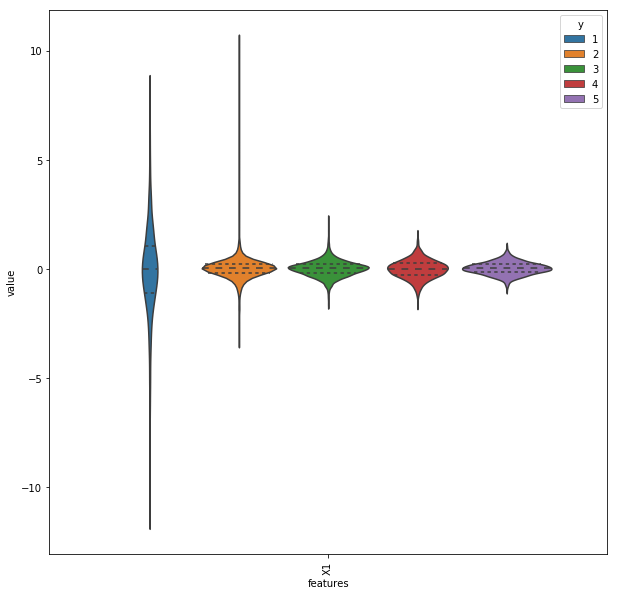

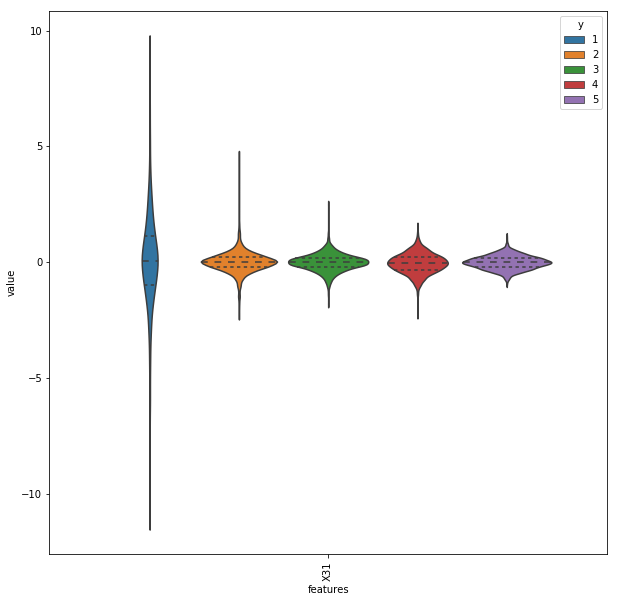

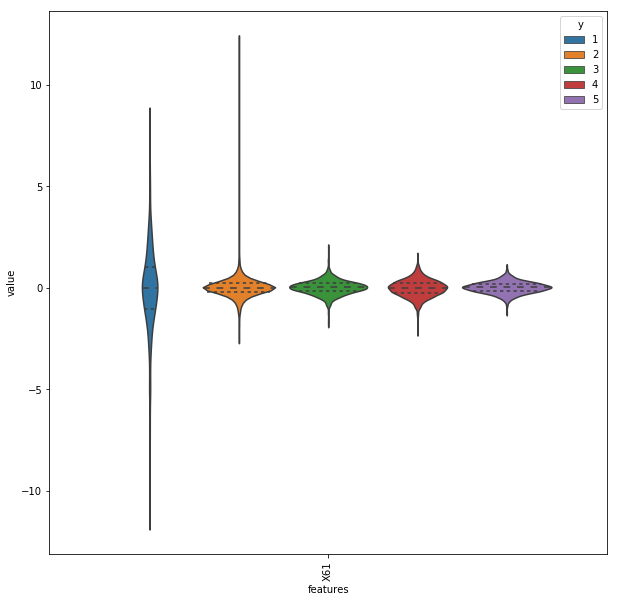

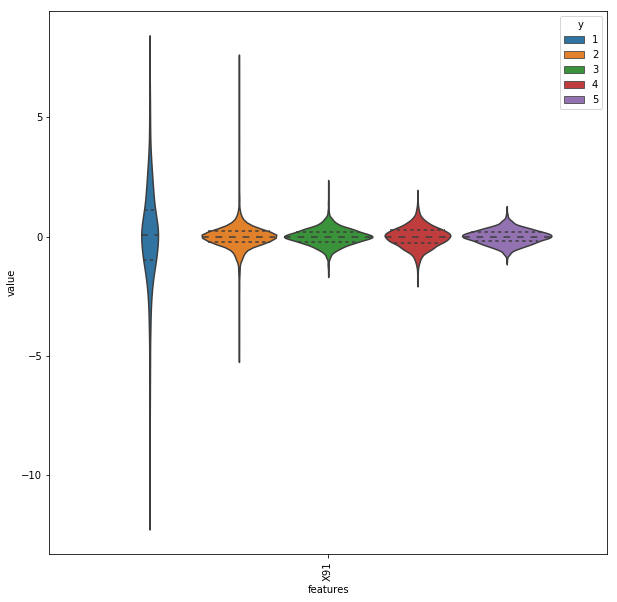

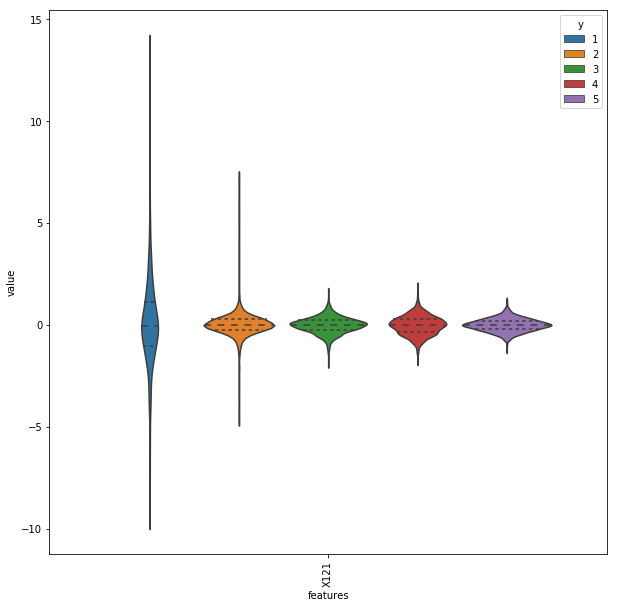

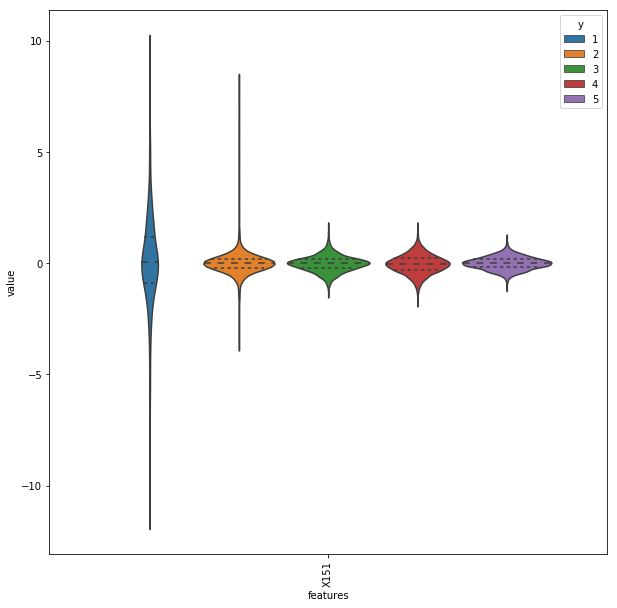

In [17]:
for i in range(0,179, 30):
    data_scaled = pd.concat([y,X_scaled.iloc[:,i]],axis=1)
    data_scaled = pd.melt(data_scaled,id_vars="y", var_name="features", value_name='value')

    plt.figure(figsize=(10,10))
    sb.violinplot(x="features", y="value", hue="y", data=data_scaled, inner="quart")
    plt.xticks(rotation=90)

# Now how many components should we use with the PCA?

Text(0,0.5,'explained_variance_ratio_')

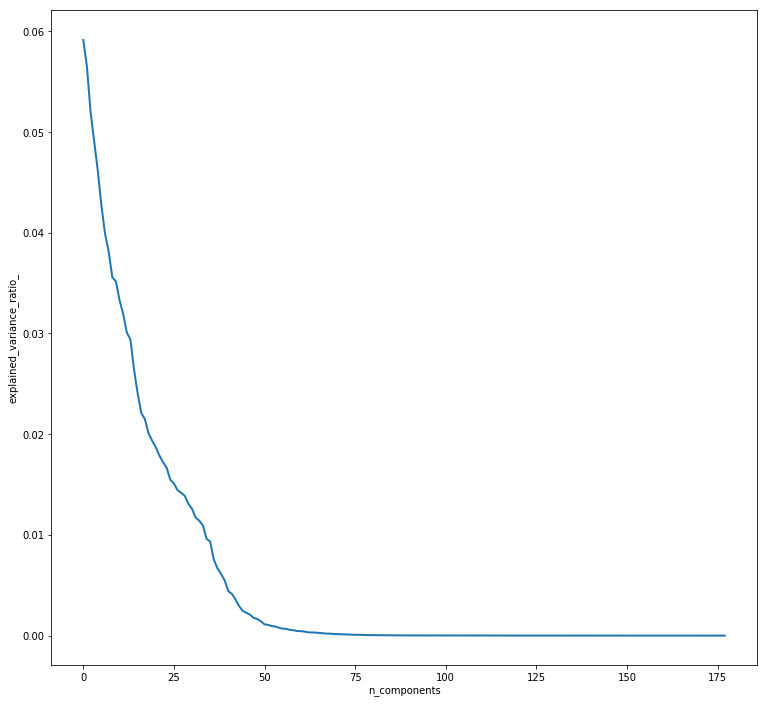

In [7]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')


# In conclusion, the dataset is clean, equally distributed and has some linear covariance. 
# Before training a model on the data it needs to be scaled. 
# To avoid distortion of a model the dimensionality can be reduced using PCA or by using the reduced dataset with VIF < 5 (stored as csv). The number of components for PCA should be chosen around 70ish.
